In [1]:
import email
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pathlib import Path
from email_reply_parser import EmailReplyParser
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
df_chunk = pd.read_csv(Path('..','emails.csv'), chunksize=10000)
df = next(df_chunk)

In [3]:
df.shape

(10000, 2)

In [ ]:
# extract_name = re.compile(r'^([a-z0-9\-]*)/')
# df['name'] = df['file'].str.extract(extract_name)

In [4]:
def extract_text(message):
    """
    Parses the last message in case there are multiple replies.
    """
    
    msg = email.message_from_string(message)
    msg = msg.get_payload()
    
    return EmailReplyParser.parse_reply(msg)


def extract_item(message, item):
    """
    Extract message item
    """
    
    msg = email.message_from_string(message)
    
    return msg[item]
    

In [5]:
df['text'] = df['message'].apply(extract_text)

In [ ]:
# df['date'] = pd.to_datetime(df['message'].apply(extract_item, args=('Date',)))

In [ ]:
# df.loc[1,'text']
# df['text']
# print(df.loc[9997,'message'])
# print(df.loc[9997,'text'])
# print(df.loc[9995,'message'])
# print(df.loc[9995,'text'])

In [54]:
cv = CountVectorizer(stop_words='english')

In [55]:
stop_words = cv.get_stop_words().union(['ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject',\
                                         'forwarded', 'corp', 'said', 'attached', 'ect',\
                                         'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new'\
                                         'enronxgate', 'na', 'year',\
                                        'td', 'font', 'image', 'size', 'align', 'http', 'tr','iso','br','span',\
                                       'class', 'left','right',])

In [56]:

cv = CountVectorizer(stop_words=stop_words, max_features=2000)

In [57]:
X = cv.fit_transform(df['text'])

In [58]:
X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

In [59]:
for i, j in enumerate(X_df.columns):
    print(i, j)

0 00
1 000
2 000000000041547
3 00pm
4 01
5 02
6 03
7 04
8 05
9 05pm
10 06
11 07
12 08
13 09
14 090
15 0f
16 0pt
17 10
18 100
19 1000
20 10pm
21 11
22 11th
23 12
24 120
25 125
26 13
27 14
28 1400
29 15
30 150
31 1500
32 15pm
33 16
34 17
35 18
36 19
37 1996
38 1997
39 1998
40 1999
41 1st
42 20
43 200
44 2000
45 2001
46 2002
47 2003
48 20pm
49 21
50 22
51 225
52 23
53 24
54 25
55 250
56 25pm
57 26
58 27
59 28
60 29
61 30
62 300
63 30pm
64 31
65 312
66 32
67 33
68 34
69 345
70 3490
71 35
72 350
73 35pm
74 36
75 37
76 38
77 39
78 3d
79 40
80 400
81 40pm
82 41
83 42
84 43
85 44
86 45
87 45pm
88 46
89 47
90 48
91 49
92 50
93 500
94 50pm
95 51
96 512
97 52
98 53
99 54
100 55
101 56
102 57
103 58
104 59
105 60
106 600
107 608
108 62
109 63
110 64
111 646
112 65
113 67
114 68
115 690
116 70
117 700
118 7041
119 71
120 713
121 74
122 75
123 750
124 75pt
125 76
126 762
127 77002
128 80
129 800
130 81
131 83
132 84
133 85
134 853
135 87
136 877
137 88
138 90
139 91
140 916
141 92
142 94
143 95
144 

1534 reporting
1535 reports
1536 represent
1537 representative
1538 represents
1539 request
1540 requested
1541 require
1542 required
1543 requirements
1544 research
1545 reserve
1546 reserved
1547 reserves
1548 residential
1549 resorts
1550 resource
1551 resources
1552 respect
1553 respective
1554 respond
1555 response
1556 responsible
1557 rest
1558 restructuring
1559 result
1560 results
1561 resume
1562 retail
1563 return
1564 returns
1565 reuters
1566 revenue
1567 revenues
1568 review
1569 reviewed
1570 revised
1571 rich
1572 richard
1573 richards
1574 right
1575 rights
1576 rise
1577 risk
1578 risks
1579 rival
1580 road
1581 robert
1582 role
1583 roll
1584 ron
1585 room
1586 rooms
1587 rose
1588 round
1589 rr
1590 rs
1591 rsvp
1592 rules
1593 run
1594 running
1595 sachs
1596 sale
1597 sales
1598 salomon
1599 san
1600 sans
1601 sap
1602 sarah
1603 saturday
1604 saudi
1605 save
1606 savings
1607 saw
1608 say
1609 saying
1610 says
1611 sc
1612 scale
1613 sce
1614 schedule
1615 schedu

Remove columns from 0 to 145

In [60]:
n_index = X_df.columns.get_loc('99') + 1

In [61]:
n_index

147

In [62]:
X_df = X_df.drop(X_df.iloc[:,:n_index], axis=1)

In [63]:
true_k = 5
model = KMeans(n_clusters=true_k, max_iter=500, n_init=1, verbose=1)
model.fit(X_df)

Initialization complete
Iteration 0, inertia 2593430.0
Iteration 1, inertia 2090140.3124094666
Iteration 2, inertia 2006259.9096859382
Iteration 3, inertia 1990828.579826711
Iteration 4, inertia 1969190.6122613482
Iteration 5, inertia 1967721.2984077968
Iteration 6, inertia 1966951.029755521
Converged at iteration 6: strict convergence.


KMeans(max_iter=500, n_clusters=5, n_init=1, verbose=1)

In [64]:
from joblib import dump, load

In [65]:
dump(model, 'model.joblib')

['model.joblib']

In [66]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()[n_index:]

In [67]:
terms

array(['ability', 'able', 'accept', ..., 'youngflesh', 'zip', 'zone'],
      dtype=object)

In [68]:
model.cluster_centers_.argsort()

array([[1062, 1094, 1061, ...,  674,  994,  776],
       [1210,  401,   48, ..., 1427, 1705, 1072],
       [   0, 1148, 1147, ...,  501,  776, 1814],
       [1072, 1210,  228, ..., 1610,  491,  307],
       [   0, 1039, 1038, ..., 1062, 1427, 1623]])

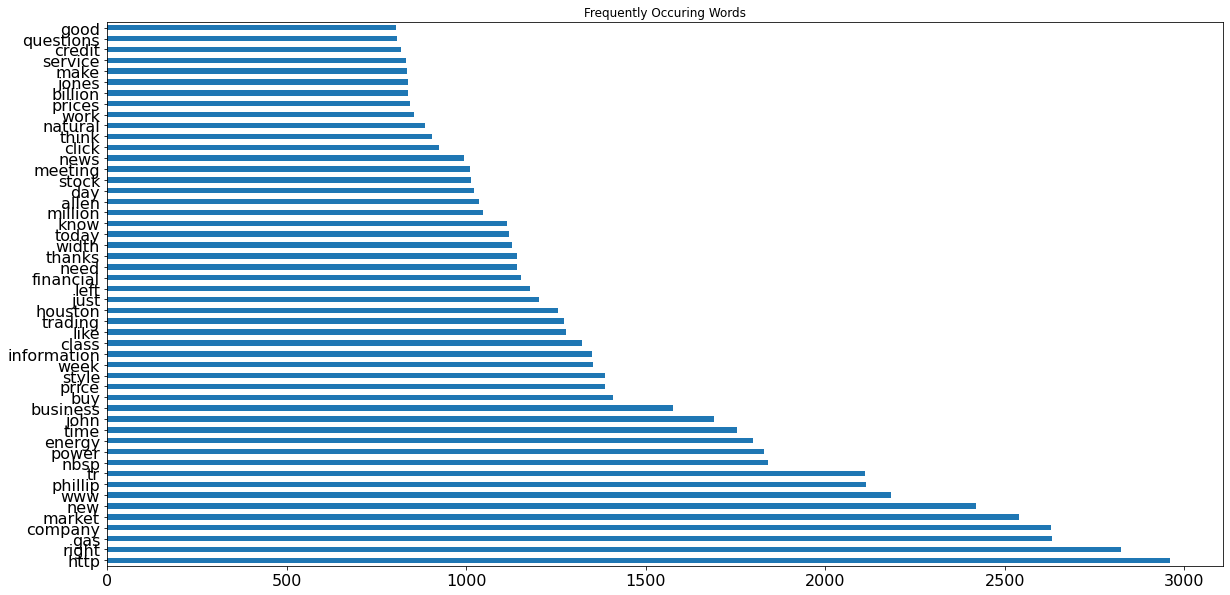

In [69]:
X_df.sum().sort_values(ascending=False).head(50).plot(kind='barh',
                                                                  figsize=(20,10),
                                                                  fontsize=16,
                                                                  title='Frequently Occuring Words');

In [70]:
X_df.sum().sort_values(ascending=False).head(50).to_frame()

,0
http,2960
right,2825
gas,2631
company,2628
market,2541
new,2421
www,2184
phillip,2113
tr,2112
nbsp,1842


In [ ]:
adf